In [378]:
import pandas as pd
import datetime
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [379]:
dfCSV = pd.read_csv('data/BTCUSDT_Binance_futures_data_hour.csv')

In [380]:
# Week starts on sunday because english people are weird 
volume = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],]
hourControl= [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

lastDate = 0
endDate = datetime.datetime(2020,8,3).timestamp()
for row in dfCSV.itertuples(index=False, name='BTCPrice'):
    date = datetime.datetime.fromtimestamp(row.unix/1000)
    # I DONT KNOW WHO MERGED THIS DATASET BUT IT USES UNIX WITH TWO DIFFERENT SCALES FUUUUU
    if date.year > 2000: 
        if date == endDate: # End
            lastDate = date
            print(row.unix)
            break

        hour = date.hour

        volume[hour][0] += row.VolumeUSDT
        volume[hour][1] += row.VolumeBTC
        hourControl[hour] += 1
        volume[hour][2] += float(row.tradecount)
        
        lastDate = date
    
volumeDf = pd.DataFrame (data= volume,columns=['volumeUSDT', 'volumeBTC', 'tradecount'])
volumeDf['hour'] = ['00:00','01:00','02:00','03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

print(volumeDf)
print(hourControl)
print(lastDate)

      volumeUSDT    volumeBTC  tradecount   hour
0   7.583404e+10  2616002.496  18821277.0  00:00
1   9.690461e+10  3234639.030  22722973.0  01:00
2   8.316246e+10  2813790.604  19790040.0  02:00
3   7.403238e+10  2444197.870  17807052.0  03:00
4   7.586452e+10  2613017.825  18220320.0  04:00
5   7.915339e+10  2532016.620  18867945.0  05:00
6   8.024081e+10  2711522.724  18878718.0  06:00
7   7.750524e+10  2510426.268  18473318.0  07:00
8   8.749162e+10  2857348.699  20264354.0  08:00
9   1.048364e+11  3525953.072  23955939.0  09:00
10  1.115483e+11  3596386.150  25383647.0  10:00
11  1.046155e+11  3475813.304  24113944.0  11:00
12  1.046066e+11  3644947.913  24410856.0  12:00
13  1.263280e+11  4256862.517  28665622.0  13:00
14  1.232398e+11  4238663.949  28162649.0  14:00
15  1.240423e+11  4442086.758  28297938.0  15:00
16  1.250605e+11  4512116.476  28212360.0  16:00
17  1.340770e+11  4661457.260  29976173.0  17:00
18  9.915165e+10  3661590.483  23219915.0  18:00
19  8.777023e+10  30

In [381]:
sns.set_style("darkgrid")
flatui = ["#4f6d7a","#f19a3e","#69995D","#4a6fa5","#166088","#e27396","#6e4555"]
sns.set_palette(flatui)

[Text(0, 0.5, 'Timezone GMT+1'),
 Text(0.5, 0, 'Volume traded in BTC for BINANCE:BTCUSDT Futures')]

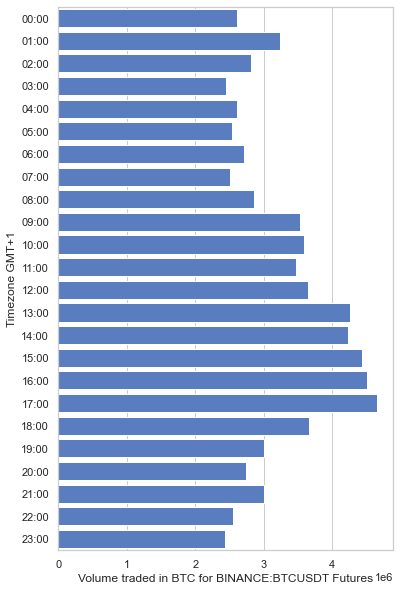

In [382]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(6, 10))
sns.set_color_codes("muted")
sns.barplot(x="volumeBTC", y="hour", data=volumeDf,
            color="b")

ax.set(ylabel="Timezone GMT+1",
       xlabel="Volume traded in BTC for BINANCE:BTCUSDT Futures")

[Text(0, 0.5, 'Timezone GMT+1'),
 Text(0.5, 0, 'Volume traded in USDT for BINANCE:BTCUSDT Futures')]

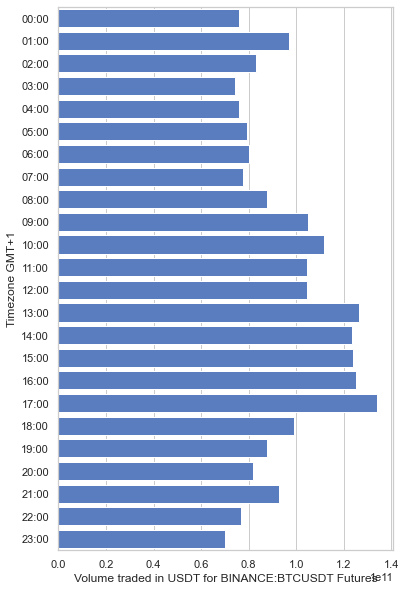

In [383]:
f, ax = plt.subplots(figsize=(6, 10))
ax= sns.barplot(x="volumeUSDT", y="hour", data=volumeDf,
            color="b")

ax.set(ylabel="Timezone GMT+1",
       xlabel="Volume traded in USDT for BINANCE:BTCUSDT Futures")

[Text(0, 0.5, 'Timezone GMT+1'),
 Text(0.5, 0, 'Trade Count for BINANCE:BTCUSDT Futures')]

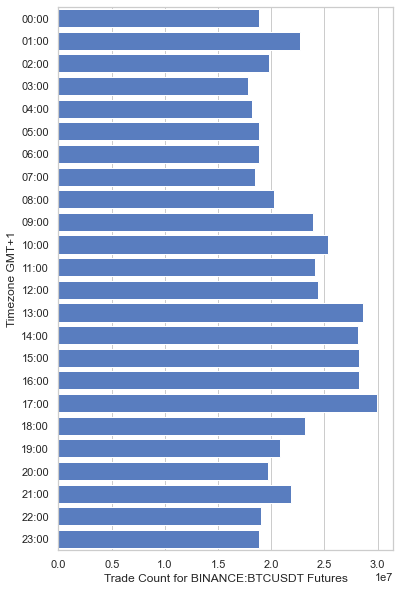

In [384]:
f, ax = plt.subplots(figsize=(6, 10))
ax= sns.barplot(x="tradecount", y="hour", data=volumeDf,
            color="b")

ax.set(ylabel="Timezone GMT+1",
       xlabel="Trade Count for BINANCE:BTCUSDT Futures")